Files already downloaded and verified
Saved grid image with shape: torch.Size([3, 70, 274])


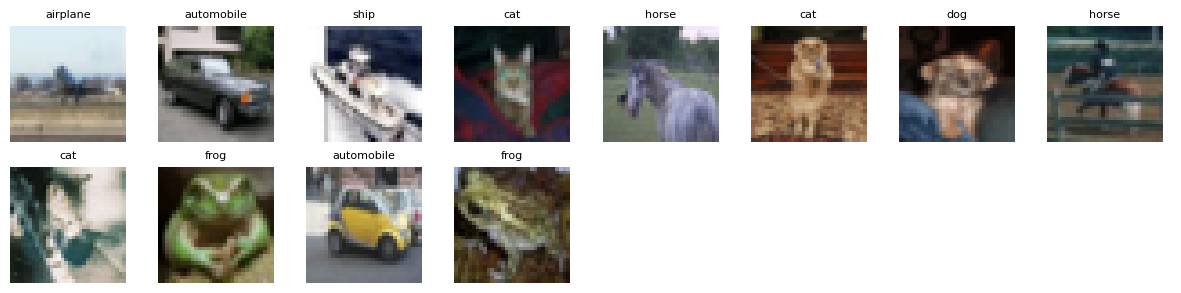

Image size: torch.Size([12, 3, 32, 32])
Value range: [0.000, 1.000]
Labels shape: torch.Size([12])


In [13]:
import torch
import torchvision
from torchvision import transforms as T
from torchvision.utils import make_grid, save_image
import matplotlib.pyplot as plt

# Same settings as your code
image_size = 32
batch_size = 12

# Create dataset with same transforms
dataset = torchvision.datasets.CIFAR10(
    root="/mnt/nvme/",
    train=True,
    download=True,
    transform=T.Compose([
        T.Resize((image_size, image_size)),
        T.RandomHorizontalFlip(),
        T.ToTensor(),  # This converts to [0, 1]
    ]),
)

# Create dataloader
dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True, drop_last=True
)

# Get one batch
data_iter = iter(dataloader)
images, labels = next(data_iter)

# CIFAR10 class names
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']

# Get actual batch size
actual_batch_size = images.shape[0]
num_images_to_show = min(32, actual_batch_size)

# Method 1: Save as grid image
grid = make_grid(images[:num_images_to_show], nrow=8)  # Show available images
save_image(grid, 'dataloader_preview.png')
print(f"Saved grid image with shape: {grid.shape}")

# Method 2: Matplotlib visualization
n_rows = (num_images_to_show + 7) // 8  # Calculate needed rows
fig, axes = plt.subplots(n_rows, 8, figsize=(12, n_rows * 1.5))
axes = axes.ravel() if n_rows > 1 else [axes]  # Handle single row case

for i in range(num_images_to_show):
    img = images[i].permute(1, 2, 0)  # CHW -> HWC for matplotlib
    axes[i].imshow(img)
    axes[i].set_title(f'{classes[labels[i]]}', fontsize=8)
    axes[i].axis('off')
    
# Hide any unused subplots
for i in range(num_images_to_show, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('dataloader_matplotlib.png', dpi=150)
plt.show()

# Print info
print(f"Image size: {images.shape}")  # [64, 3, 16, 16]
print(f"Value range: [{images.min():.3f}, {images.max():.3f}]")  # Should be [0, 1]
print(f"Labels shape: {labels.shape}")  # [64]

Loading model from /mnt/nvme/checkpoint/dit_direct/step_55000.pth...
Generating images...
class:  tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], device='cuda:0')
Using cfg_scale: 1.5
Using cfg_scale: 1.5
Using cfg_scale: 1.5
Using cfg_scale: 1.5
Using cfg_scale: 1.5
Using cfg_scale: 1.5
Using cfg_scale: 1.5
Using cfg_scale: 1.5
Using cfg_scale: 1.5
Using cfg_scale: 1.5
class labels:  tensor([6, 3, 8, 8, 0, 5, 9, 2, 1, 1], device='cuda:0')
sample using cfg_scale: 1.5
sample using cfg_scale: 1.5
sample using cfg_scale: 1.5
sample using cfg_scale: 1.5
sample using cfg_scale: 1.5
sample using cfg_scale: 1.5
sample using cfg_scale: 1.5
sample using cfg_scale: 1.5
sample using cfg_scale: 1.5
sample using cfg_scale: 1.5


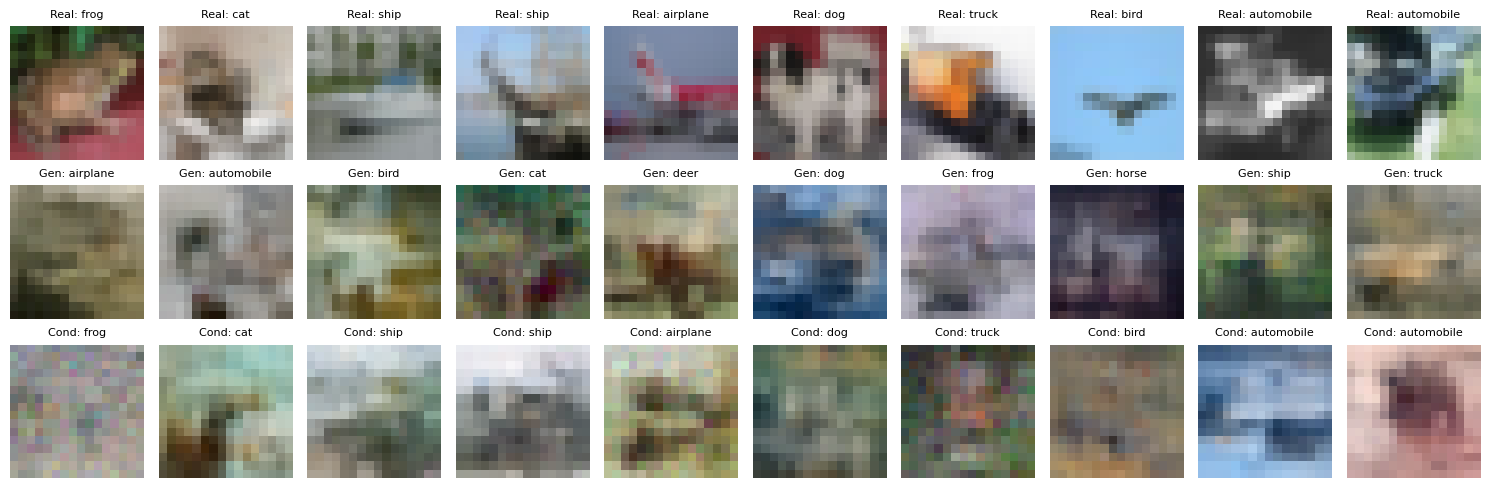

Saving image grids...
class:  tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
        4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7,
        8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
        2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
        6, 7, 8, 9], device='cuda:0')
Using cfg_scale: 1.0
Using cfg_scale: 1.0
Using cfg_scale: 1.0
Using cfg_scale: 1.0
Using cfg_scale: 1.0
Using cfg_scale: 1.0
Using cfg_scale: 1.0
Using cfg_scale: 1.0
Using cfg_scale: 1.0
Using cfg_scale: 1.0
Generated with CFG scale 1.0
class:  tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
        4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7,
        8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
        2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
        6, 7, 8, 9], device='cuda:0')
Using c

In [10]:
import torch
import torchvision
from torchvision import transforms as T
from torchvision.utils import make_grid, save_image
import matplotlib.pyplot as plt
from dit import DiT
from model import RectifiedFlow
import os

def load_model(checkpoint_path, device='cuda'):
    """Load the trained model from checkpoint"""
    
    # Load checkpoint
    checkpoint = torch.load(checkpoint_path, map_location=device)
    config = checkpoint['config']
    
    # Create model with same architecture
    model = DiT(
        input_size=config['image_size'],
        patch_size=2,
        in_channels=config['image_channels'],
        dim=384,
        depth=12,
        num_heads=6,
        num_classes=10,
        learn_sigma=False,
        class_dropout_prob=0.1,
    ).to(device)
    
    # Load the EMA weights (usually better than regular model)
    model.load_state_dict(checkpoint['model'])
    model.eval()
    
    # Create sampler
    sampler = RectifiedFlow(
        model,
        device=device,
        channels=config['image_channels'],
        image_size=config['image_size'],
        num_classes=10,
        use_logit_normal_cosine=True,
        logit_normal_loc=0.0,
        logit_normal_scale=1.0,
        timestep_min=1e-8,
        timestep_max=1.0-1e-8,
    )
    
    return model, sampler, config

def generate_and_compare(checkpoint_path, device='cuda'):
    """Generate images and compare with real data"""
    
    # Load model
    print(f"Loading model from {checkpoint_path}...")
    model, sampler, config = load_model(checkpoint_path, device)
    
    image_size = config['image_size']
    
    # Load real data for comparison
    dataset = torchvision.datasets.CIFAR10(
        root="/mnt/nvme/",
        train=True,
        download=False,
        transform=T.Compose([
            T.Resize((image_size, image_size)),
            T.ToTensor(),
        ]),
    )
    
    dataloader = torch.utils.data.DataLoader(
        dataset, batch_size=10, shuffle=True, drop_last=True
    )
    
    # Get one batch of real images
    real_images, real_labels = next(iter(dataloader))
    
    # CIFAR10 classes
    classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
    cfg_scale = 1.5
    # Generate images for each class
    print("Generating images...")
    with torch.no_grad():
        # Method 1: Generate one sample per class
        generated_samples = sampler.sample_each_class(
            n_per_class=1, 
            cfg_scale=cfg_scale,  # Classifier-free guidance scale
        )
        
        # Method 2: Generate specific classes (same as real labels)
        generated_conditional = sampler.sample(
            class_labels=real_labels.to(device),
            cfg_scale=cfg_scale,
            sample_steps=10
        )
    
    # Visualize results
    fig, axes = plt.subplots(3, 10, figsize=(15, 5))
    
    # Row 1: Real images
    for i in range(10):
        img = real_images[i].permute(1, 2, 0)
        axes[0, i].imshow(img)
        axes[0, i].set_title(f'Real: {classes[real_labels[i]]}', fontsize=8)
        axes[0, i].axis('off')
    
    # Row 2: Generated (one per class)
    for i in range(10):
        img = generated_samples[i].cpu()
        # img = (img + 1) / 2  # Convert from [-1, 1] to [0, 1]
        img = img.clamp(0, 1).permute(1, 2, 0)
        axes[1, i].imshow(img)
        axes[1, i].set_title(f'Gen: {classes[i]}', fontsize=8)
        axes[1, i].axis('off')
    
    # Row 3: Generated (conditional on real labels)
    for i in range(10):
        img = generated_conditional[i].cpu()
        # img = (img + 1) / 2  # Convert from [-1, 1] to [0, 1]
        img = img.clamp(0, 1).permute(1, 2, 0)
        axes[2, i].imshow(img)
        axes[2, i].set_title(f'Cond: {classes[real_labels[i]]}', fontsize=8)
        axes[2, i].axis('off')
    
    axes[0, 0].set_ylabel('Real Data', fontsize=10)
    axes[1, 0].set_ylabel('Generated\n(Each Class)', fontsize=10)
    axes[2, 0].set_ylabel('Generated\n(Conditional)', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('inference_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Save grids
    print("Saving image grids...")
    
    # Save generated samples grid
    generated_grid = make_grid(generated_samples, nrow=10)
    save_image(generated_grid, 'generated_samples.png')
    
    # Generate more samples with different CFG scales
    for cfg_scale in [1.0, 2.5, 5.0]:
        samples = sampler.sample_each_class(n_per_class=10, cfg_scale=cfg_scale, return_all_steps=False)
        grid = make_grid(samples, nrow=10)
        save_image(grid, f'generated_cfg_{cfg_scale}.png')
        print(f"Generated with CFG scale {cfg_scale}")
    
    print("Inference complete!")

if __name__ == "__main__":
    # Specify your checkpoint path
    checkpoint_path = "/mnt/nvme/checkpoint/dit_direct/step_55000.pth"  # Change this to your checkpoint
    
    # Alternative: use the final checkpoint
    # checkpoint_path = "/mnt/nvme/checkpoint/dit_direct/model_direct_final.pth"
    
    if not os.path.exists(checkpoint_path):
        print(f"Checkpoint not found at {checkpoint_path}")
        print("Available checkpoints:")
        checkpoint_dir = "/mnt/nvme/checkpoint/dit_direct/"
        if os.path.exists(checkpoint_dir):
            for f in os.listdir(checkpoint_dir):
                if f.endswith('.pth'):
                    print(f"  - {f}")
    else:
        generate_and_compare(checkpoint_path)